In [19]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the customer data from the csv file.

In [20]:
maintrecs = pd.read_csv("data/bmaintenancedistrict2019-20.csv",
                        encoding_errors='replace',engine='python',skiprows=5,skipfooter=15,
                        usecols=[0,1,6,8,19,20,21,22],
                        names=['ReportingYear','StateName','TotalAllocation','AllocationChange','DisproportionateDisability','DisproportionateCategory','DisproportionateSetting','DisproportionateDiscipline'])

Convert the column values containing (mostly) numbers, accommodating missing values.

In [21]:
maintrecs['TotalAllocation'] = pd.to_numeric(maintrecs['TotalAllocation'], errors='coerce')
maintrecs['AllocationChange'] = pd.to_numeric(maintrecs['AllocationChange'], errors='coerce')
maintrecs['DisproportionateDisability'] = pd.to_numeric(maintrecs['DisproportionateDisability'], errors='coerce')
maintrecs['DisproportionateCategory'] = pd.to_numeric(maintrecs['DisproportionateCategory'], errors='coerce')
maintrecs['DisproportionateSetting'] = pd.to_numeric(maintrecs['DisproportionateSetting'], errors='coerce')
maintrecs['DisproportionateDiscipline'] = pd.to_numeric(maintrecs['DisproportionateDiscipline'], errors='coerce')

Aggregate data by Reporting Year and StateName.

In [22]:
maintrecs.dtypes

ReportingYear                   int64
StateName                      object
TotalAllocation               float64
AllocationChange              float64
DisproportionateDisability    float64
DisproportionateCategory      float64
DisproportionateSetting       float64
DisproportionateDiscipline    float64
dtype: object

In [23]:
statedata = maintrecs.groupby(['ReportingYear','StateName']).sum()

In [24]:
statedata.head

<bound method NDFrame.head of                                                 TotalAllocation  \
ReportingYear StateName                                           
2019          Alabama                              1.731391e+08   
              Alaska                               3.525383e+07   
              American Samoa                       6.368582e+06   
              Arizona                              1.916106e+08   
              Arkansas                             1.072131e+08   
              Bureau of Indian Education           7.527652e+07   
              California                           1.153831e+09   
              Colorado                             1.542120e+08   
              Connecticut                          1.227105e+08   
              Delaware                             3.302309e+07   
              District of Columbia                 1.692909e+07   
              Federated States of Micronesia       3.885884e+06   
              Florida           

Visualizing relationship between StateName and Total allocation.

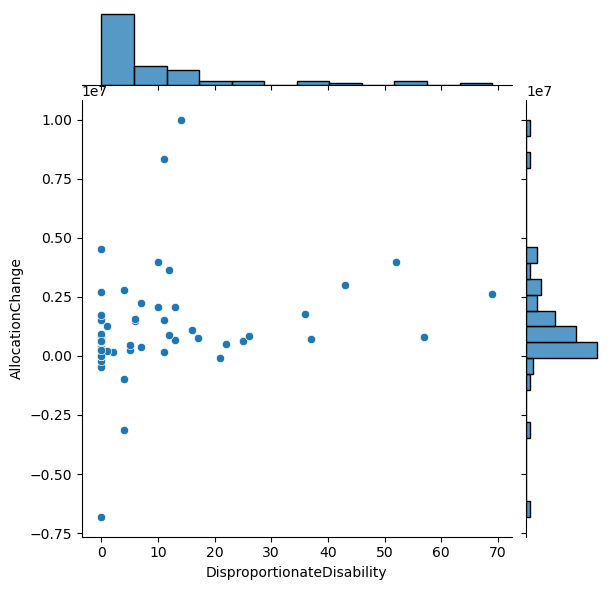

In [26]:
sns.jointplot(x='DisproportionateDisability',y='AllocationChange',data=statedata)

Using Pairplot to find out the different visualizations.

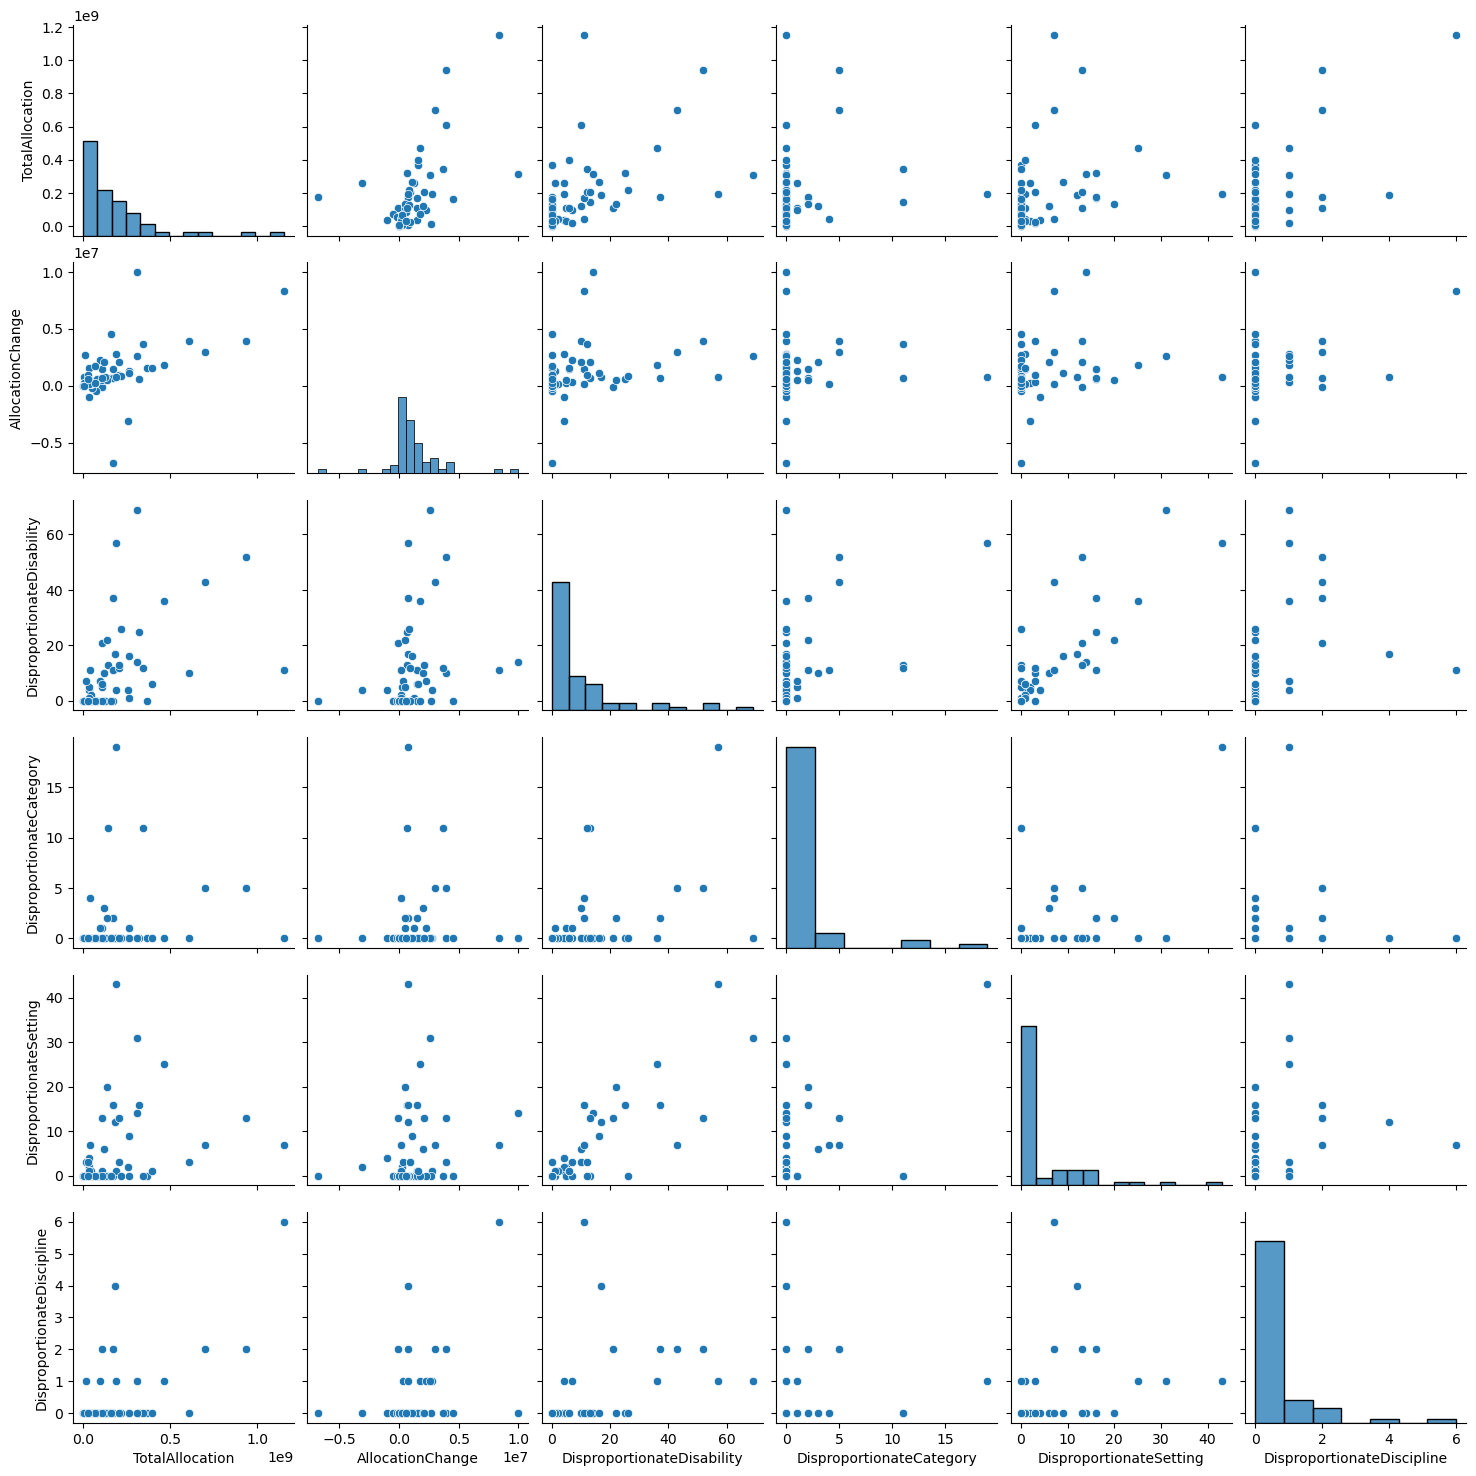

In [27]:
sns.pairplot(statedata)

Dividing the data to decide the dependent and independent variable.

In [29]:
y = statedata['AllocationChange']
X = statedata[['DisproportionateDisability','DisproportionateCategory','DisproportionateSetting', 'DisproportionateDiscipline']]

Using sklearn to train and test split the data.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  1419.56667684 -19405.18586238  20470.441436   969542.48172911]


In [35]:
predictions = lm.predict( X_test)

Let's create a plot of the real values against predicted values

Text(0, 0.5, 'Predicted Y')

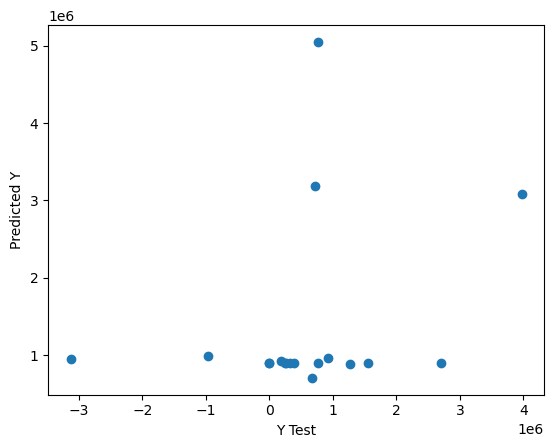

In [36]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [37]:
from sklearn import metrics
print('MEAN Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MEAN Absolute Error: 1201994.4440921936
Mean Squared Error: 2947008744519.454
Root Mean Squared Error: 1716685.3947416965


In [38]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
DisproportionateDisability,1419.566677
DisproportionateCategory,-19405.185862
DisproportionateSetting,20470.441436
DisproportionateDiscipline,969542.481729
